In [0]:
!pip install tensorflow-gpu==2.0.0-alpha0
import tensorflow as tf
import numpy as np
print(tf.__version__)

2.0.0-alpha0


In [0]:
!pip install tensorflow==2.0.0

In [0]:
!pip install gym pyvirtualdisplay
!apt-get install -y xvfb python-opengl ffmpeg

!apt-get update
!apt-get install cmake
!pip install --upgrade setuptools
!pip install ez_setup
!pip install gym[atari]

!pip install box2d-py
!pip install gym[Box_2D]

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python-opengl is already the newest version (3.1.0+dfsg-1).
ffmpeg is already the newest version (7:3.4.6-0ubuntu0.18.04.1).
xvfb is already the newest version (2:1.19.6-1ubuntu4.4).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:6 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:10 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRe

In [0]:
!pip install pyglet==1.3.2

     |████████████████████████████████| 1.0MB 2.7MB/s 
ERROR: gym 0.17.1 has requirement pyglet<=1.5.0,>=1.4.0, but you'll have pyglet 1.3.2 which is incompatible.
  Found existing installation: pyglet 1.4.0
    Uninstalling pyglet-1.4.0:
      Successfully uninstalled pyglet-1.4.0


# 10.1 신경망으로 경험 학습하기

강화학습의 환경으로 사용할 Gym에 대해서 알아보자.

Gym의 구조는 강화학습에서 요구하는 표준적인 구조이다. 일단 문제가 주어진 환경(environment)이 있고 강화학습 문제를 풀기위한 에이전트가 존재한다.

s

#### 에이전트란?
행동(action)으로 환경에 영향을 주고 그 결과에 따라 보상(reward)을 받는다. 좋은 보상을 받으면 에이전트는 그 행동을 더 많이 하게 되고 나쁜 보상을 받으면 그 행동을 덜 하도록 학습하는 것이 강화학습의 기본이다.

- #### 강화학습의 목적 : 행동의 결과로 주어지는 보상을 극대화 하는데 목적 
- Gym의 MountainCar-v10 : 두 바퀴가 달린 차(에이전트)로 언덕(환경)을 올라가는 문제
  이때 보상은 각 시간 단위(time step)마다 -1이 주어지고 오른쪽 깃발에 도달하면 하나의 에피소드(episode)가 끝난다.
  즉, 보상은 음수로 주어지며 에피소드를 빨리 끝낼수록 한 에피소드에 얻는 보상의 총합이 커지기 때문에 가장 짧은 시간에 언덕을 올라야 한다.

#### 이 환경에서 에이전트가 취할 수 있는 행동
- 왼쪽으로 이동
- 정지
- 오른쪽으로 이동 
  : 오른쪽으로 이동하는 행동은 가파른 언덕을 올라갈 만큼의 충분한 힘을 못받아 이 행동만으로 언덕을 올라갈 수 없다.
  즉, 왼족과 오른쪽을 반복해서 움직이며 가속도를 붙인 다음 언덕에 올라갈 수 있다.

In [0]:
# MountainCar-v0 환경 만들기
import gym
import random
env = gym.make('MountainCar-v0')

In [0]:
# 환경의 관찰 공간, 행동 공간 변수 확인
print(env.observation_space)
print(env.observation_space.low)
print(env.observation_space.high)
print()
print(env.action_space)
print()
print(env._max_episode_steps)

Box(2,)
[-1.2  -0.07]
[0.6  0.07]

Discrete(3)

200


- #### observation space란? 
  : 에이전트가 환경을 볼 수 있는 작은 창이다. 에이전트는 이 창을 통해서 환경의 정보를 파악할 수 있기 때문에 관찰 공간에 대한 정보는 모든 환경에서 최우선적으로 파악해야 한다.
- #### Box 란?
  : 최댓값과 최솟값을 가지는 범위 값이라는 의미이고 여기서 env.observation_space.low 와 high는 각각 최솟값과 최댓값을 의미한다.
- low와 high의 첫번째 숫자는 차(에이전트)의 X축 좌표이고 두번째 숫자는 차의 속도이다. 
  속도가 음수이면 왼쪽
  속도가 양수이면 오른쪽으로 이동
- #### action space란?
  에이전트가 취할 수 있는 행동의 경우의 수
  이번 문제의 경우 : 왼쪽, 오른쪽, 정지 3가지의 경우의 수
- #### env._max_episode_steps란?
  최대 시간 단위의 제한을 두어 에피소드가 무한히 반복하는 것을 방지
  
  
- #### 정리를 해보면->
  X좌표 범위는 -1.2에서 0.6까지 움직이고 최대 속도는 0.07, 최소 속도는 -0.07이다. action을 취할 수 있는 경우의 수는 3번이고 최대 시간 단위는 200으로 200이 되면 종료가 된다.

In [0]:
# 랜덤한 행동을 하는 에이전트 실행
step = 0
score = 0
env.reset()

while True:
    action = env.action_space.sample()
    obs, reward, done, info = env.step(action)
    print(score)
    score += reward
    step += 1
    
    if done:
        break

print('score:', score)
print('step:', step)

0
-1.0
-2.0
-3.0
-4.0
-5.0
-6.0
-7.0
-8.0
-9.0
-10.0
-11.0
-12.0
-13.0
-14.0
-15.0
-16.0
-17.0
-18.0
-19.0
-20.0
-21.0
-22.0
-23.0
-24.0
-25.0
-26.0
-27.0
-28.0
-29.0
-30.0
-31.0
-32.0
-33.0
-34.0
-35.0
-36.0
-37.0
-38.0
-39.0
-40.0
-41.0
-42.0
-43.0
-44.0
-45.0
-46.0
-47.0
-48.0
-49.0
-50.0
-51.0
-52.0
-53.0
-54.0
-55.0
-56.0
-57.0
-58.0
-59.0
-60.0
-61.0
-62.0
-63.0
-64.0
-65.0
-66.0
-67.0
-68.0
-69.0
-70.0
-71.0
-72.0
-73.0
-74.0
-75.0
-76.0
-77.0
-78.0
-79.0
-80.0
-81.0
-82.0
-83.0
-84.0
-85.0
-86.0
-87.0
-88.0
-89.0
-90.0
-91.0
-92.0
-93.0
-94.0
-95.0
-96.0
-97.0
-98.0
-99.0
-100.0
-101.0
-102.0
-103.0
-104.0
-105.0
-106.0
-107.0
-108.0
-109.0
-110.0
-111.0
-112.0
-113.0
-114.0
-115.0
-116.0
-117.0
-118.0
-119.0
-120.0
-121.0
-122.0
-123.0
-124.0
-125.0
-126.0
-127.0
-128.0
-129.0
-130.0
-131.0
-132.0
-133.0
-134.0
-135.0
-136.0
-137.0
-138.0
-139.0
-140.0
-141.0
-142.0
-143.0
-144.0
-145.0
-146.0
-147.0
-148.0
-149.0
-150.0
-151.0
-152.0
-153.0
-154.0
-155.0
-156.0
-157.0
-158.0


출력에서 매 step 마다 score가 -1 씩 더해지며 출력된고 마지막 score는 -200, step은 200으로 표시되었다.




In [0]:
# env.render() 함수의 결과를 mp4 동영상으로 보여주기 위한 코드
# from https://colab.research.google.com/drive/1flu31ulJlgiRL1dnN2ir8wGh9p7Zij2t
from gym import logger as gymlogger
from gym.wrappers import Monitor
gymlogger.set_level(40) #error only
import glob
import io
import base64
from IPython.display import HTML
from IPython import display as ipythondisplay

"""
Utility functions to enable video recording of gym environment and displaying it
To enable video, just do "env = wrap_env(env)""
"""

def show_video():
    mp4list = glob.glob('video/*.mp4')
    if len(mp4list) > 0:
        mp4 = mp4list[0]
        video = io.open(mp4, 'r+b').read()
        encoded = base64.b64encode(video)
        ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
    else: 
        print("Could not find video")
    

def wrap_env(env):
    env = Monitor(env, './video', force=True)
    return env
  
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

xdpyinfo was not found, X start can not be checked! Please install xdpyinfo!


<Display cmd_param=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '1400x900x24', ':1009'] cmd=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '1400x900x24', ':1009'] oserror=None return_code=None stdout="None" stderr="None" timeout_happened=False>

In [0]:
# 랜덤 행동 에이전트의 환경 실행 결과 확인
env = wrap_env(gym.make('MountainCar-v0'))
env.reset()

score = 0
step = 0
while True:
    action = env.action_space.sample()
    obs, reward, done, info = env.step(action)
    score += reward
    step += 1
    
    if done:
        break

print('score:', score)
print('step:', step)
env.close()
show_video()

score: -200.0
step: 200


0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
-199.9128
[-188.0, -186.0, -192.0, -180.0, -192.0, -184.0, -190.0, -184.0, -174.0, -180.0, -180.0, -172.0, -188.0, -186.0, -182.0, -184.0, -186.0, -182.0, -186.0, -186.0, -186.0, -188.0, -192.0, -174.0, -194.0, -188.0, -184.0, -186.0, -184.0, -182.0, -186.0, -188.0, -190.0, -180.0, -176.0, -174.0, -194.0, -194.0, -166.0, -194.0, -186.0, -196.0, -174.0, -190.0, -174.0, -180.0, -172.0, -184.0, -164.0, -186.0, -182.0, -182.0, -176.0]


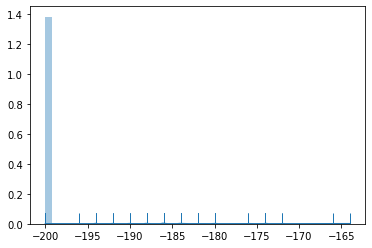

In [0]:
# 성공적인 에피소드 저장
env = gym.make('MountainCar-v0')

scores = []
training_data = []
accepted_scores = []
required_score = -198

for i in range(10000):
    if i % 100 == 0:
        print(i)
    env.reset()
    score = 0
    game_memory = []
    previous_obs = []
    
    while True:
        action = env.action_space.sample()
        obs, reward, done, info = env.step(action)
        
        if len(previous_obs) > 0:
            game_memory.append([previous_obs, action])
        
        previous_obs = obs
        if obs[0] > -0.2:
            reward = 1
        
        score += reward
        
        if done:
            break
        
    scores.append(score)
    if score > required_score:
        accepted_scores.append(score)
        for data in game_memory:
            training_data.append(data)

scores = np.array(scores)
print(scores.mean())
print(accepted_scores)

import seaborn as sns
sns.distplot(scores, rug=True)

In [0]:
# training_data 확인
training_data[:5]

[[array([-0.41089066, -0.0008352 ]), 0],
 [array([-0.41355516, -0.0026645 ]), 2],
 [array([-0.41603007, -0.00247491]), 1],
 [array([-0.41929782, -0.00326775]), 1],
 [array([-0.42333513, -0.0040373 ]), 2]]

In [0]:
# 훈련 데이터 만들기
train_X = np.array([i[0] for i in training_data]).reshape(-1, 2)
train_Y = np.array([i[1] for i in training_data]).reshape(-1, 1)
print(train_X.shape)
print(train_Y.shape)

(10547, 2)
(10547, 1)


In [0]:
# 분류 신경망 정의
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, input_shape=(2,), activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])
model.compile(optimizer=tf.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [0]:
# 분류 신경망 학습
history = model.fit(train_x, train_y, epochs=30, batch_size=16, validation_split=0.25)

Train on 4477 samples, validate on 1493 samples
Epoch 1/30
4477/4477 [==============================] - 3s 673us/sample - loss: 1.0987 - accuracy: 0.3469 - val_loss: 1.0980 - val_accuracy: 0.3496
Epoch 2/30
4477/4477 [==============================] - 1s 326us/sample - loss: 1.0977 - accuracy: 0.3493 - val_loss: 1.1001 - val_accuracy: 0.3128
Epoch 3/30
4477/4477 [==============================] - 2s 341us/sample - loss: 1.0970 - accuracy: 0.3527 - val_loss: 1.0984 - val_accuracy: 0.3771
Epoch 4/30
4477/4477 [==============================] - 1s 329us/sample - loss: 1.0959 - accuracy: 0.3699 - val_loss: 1.0952 - val_accuracy: 0.3470
Epoch 5/30
4477/4477 [==============================] - 2s 339us/sample - loss: 1.0940 - accuracy: 0.3840 - val_loss: 1.0954 - val_accuracy: 0.3791
Epoch 6/30
4477/4477 [==============================] - 1s 327us/sample - loss: 1.0925 - accuracy: 0.3844 - val_loss: 1.0919 - val_accuracy: 0.3918
Epoch 7/30
4477/4477 [==============================] - 1s 324us

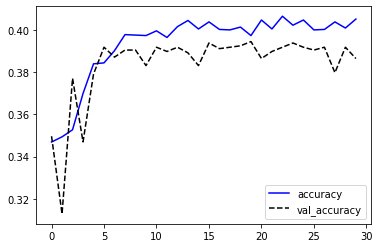

In [0]:

# 10.10 분류 신경망 학습 결과 확인
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], 'b-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.legend()
plt.show()

In [0]:
# 분류 신경망으로 에이전트 행동 확인
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

scores = []
steps = []
actions = []

for i in range(500):
    if i % 100 == 0:
        print(i)
    score = 0
    step = 0
    previous_obs = []
    env.reset()

    while True:
        if len(previous_obs) == 0:
            action = env.action_space.sample()
        else:
            logit = model.predict(np.expand_dims(previous_obs, axis=0))[0]
            action = np.argmax(logit)
            actions.append(action)
        
        obs, reward, done, info = env.step(action)
        previous_obs = obs
        score += reward
        step += 1

        if done:
            break
    
    scores.append(score)
    steps.append(step)

0
100
200
300
400


-131.806


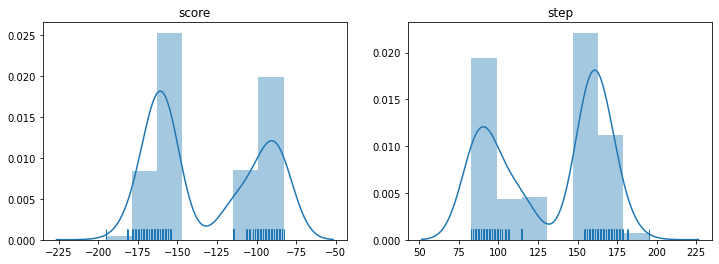

In [0]:
# score, step 분포 확인
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].set_title('score')
ax[1].set_title('step')
sns.distplot(scores, rug=True, ax=ax[0])
sns.distplot(steps, rug=True, ax=ax[1])

print(np.mean(scores))

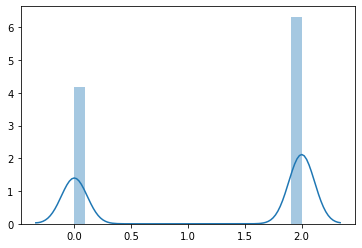

In [0]:
# 행동 분포 확인
sns.distplot(actions)

In [0]:
# 분류 신경망 행동 에이전트 실행 결과 확인
env.close()
env = wrap_env(gym.make('MountainCar-v0'))
env.reset()

score = 0
step = 0
previous_obs = []
while True:
    if len(previous_obs) == 0:
        action = env.action_space.sample()
    else:
        logit = model.predict(np.expand_dims(previous_obs, axis=0))[0]
#         logit = logit.astype(float)
#         logit = logit / logit.sum()
#         prob = np.random.multinomial(1, logit)
#         action = np.argmax(prob)
        action = np.argmax(logit)
    
    obs, reward, done, info = env.step(action)
    previous_obs = obs
    score += reward
    step += 1
    
    if done:
        break

print('score:', score)
print('step:', step)
env.close()
show_video()

score: -159.0
step: 159
